In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
train_df = pd.read_csv('data/train.csv')

In [15]:
test_df = pd.read_csv('data/test.csv')

<Axes: >

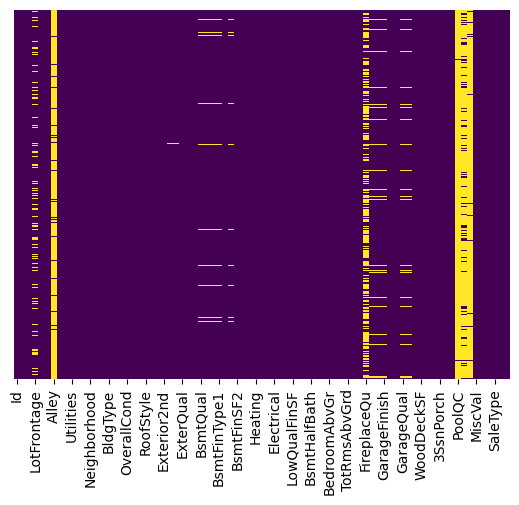

In [4]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [16]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [17]:
drop_features = ['Id', 'Alley', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']
train_df.drop(drop_features, axis=1, inplace=True)
test_df.drop(drop_features, axis=1, inplace=True)


In [18]:

mode_features = ['BsmtCond','BsmtQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                 'GarageQual', 'GarageCond', 'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType2'] 

for feature in mode_features:
    train_df[feature] = train_df[feature].fillna(train_df[feature].mode()[0])
    
    test_df[feature] = test_df[feature].fillna(test_df[feature].mode()[0])
    

In [19]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [20]:
train_df.shape

(1422, 75)

In [21]:
test_df.shape

(1410, 74)

In [22]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [23]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [24]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [26]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final


In [29]:
final_df=pd.concat([train_df,test_df],axis=0)

In [30]:
final_df.shape

(2832, 75)

In [31]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [32]:
final_df.shape

(2832, 233)

In [36]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [35]:
~final_df.columns.duplicated()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,

In [38]:
train_df = final_df.iloc[:1422, :]
test_df = final_df.iloc[1422:, :]


In [40]:
test_df.drop(['SalePrice'], axis=1, inplace=True)

/home/anil/.local/lib/python3.10/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
test_df.shape

(1410, 172)

In [42]:
x_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df['SalePrice']

In [43]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [49]:
y_pred = classifier.predict(test_df)

In [53]:
df_pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('data/sample_submission.csv')
datasets = pd.concat([sub_df["Id"], df_pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv("sample_submission.csv", index= False)

In [54]:
datasets.shape

(1459, 2)

In [58]:
feature = 'SalePrice'
datasets[feature] = datasets[feature].fillna(datasets[feature].mode()[0])
datasets.to_csv("sample_submission.csv", index= False)

In [60]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }



In [63]:
# Set up the random search with 4-fold cross validationimport 
from sklearn.model_selection import RandomizedSearchCV
import xgboost
regressor=xgboost.XGBRegressor()

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)


In [65]:


random_cv.fit(x_train,y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[17:02:21] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-16410.728, test=-22341.078) total time=   2.0s
[CV 2/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2160.108, test=-16988.993) total time=   4.0s
[CV 5/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2223.785, test=-18277.787) total time=   4.9s
[CV 4/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=900;, score=(train=-13.372, test=-15207.749) total time=  17.7s
[CV 3/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=1500;, scor

[17:02:21] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-17631.127, test=-18948.219) total time=   1.9s
[CV 1/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2249.678, test=-15909.905) total time=   4.4s
[17:02:27] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-17863.807, test=-18338.447) total time=   1.0s
[17:02:28] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-16650.8

[17:05:56] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=500;, score=(train=-18191.802, test=-18438.812) total time=   1.3s
[17:05:57] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 2/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=500;, score=(train=-17384.584, test=-22270.184) total time=   1.3s
[17:05:59] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=500;, score=(train=-18080.140, test=-19119.502) total time=   1.3s
[17:06:00] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 1/5] END base_score=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [66]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [ ]:
regressor.fit(x_train,y_train)

[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=100;, score=(train=-17533.656, test=-22817.300) total time=   0.3s
[17:05:11] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=100;, score=(train=-19228.464, test=-19165.045) total time=   0.3s
[17:05:11] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=100;, score=(train=-18563.268, test=-23004.768) total time=   0.3s
[17:05:12] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=100;, score=(train=-18180.61

[CV 5/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=100;, score=(train=-16443.357, test=-21904.012) total time=   0.3s
[17:08:04] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1500;, score=(train=-16479.504, test=-22247.977) total time=   3.7s
[17:08:08] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-17010.056, test=-22109.551) total time=   2.7s
[17:08:10] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.

[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-15

In [68]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))


In [71]:
y_pred=regressor.predict(test_df)

NotFittedError: need to call fit or load_model beforehand